<h2>Praat script to calculate formants</h2>
In order to consistently and reproducibly calculate formant traces, I will be using a script in Praat. The script is modified from one called <code>voiced_extract_auto.txt</code>, available online, which was originally written by John Tøndering and modified quite a lot by Niels Reinholt Petersen. I've added the final section to calculate and write out the formant data to a CSV file.

<p><code>name$ = selected$("Sound")
To Pitch (ac)... 0.01 60 15 no 0.03 0.7 0.01 0.35 0.14 400
median_f0 = Get quantile... 0 0 0.5 Hertz
mean_period = 1/median_f0
select Sound 'name$'
plus Pitch 'name$'
To PointProcess (cc)
To TextGrid (vuv)... 0.02 mean_period
select Sound 'name$'
plus TextGrid 'name$'_'name$'
Extract intervals where... 1 no "is equal to" V
numberOfSelectedSounds = numberOfSelected ("Sound")
Concatenate
for i from 1 to 'numberOfSelectedSounds'
slet_fil$ = "'name$'_V_'i'"
select Sound 'slet_fil$'
Remove
endfor
nytnavn$ = "'name$'_voiced"
select Sound chain
Rename... 'nytnavn$'
select PointProcess 'name$'_'name$'
Remove
# How to now get the formant file?
#########################################
# (select output sound: <original filename>_voiced)
#   FOR A WOMAN:
# To Formant (burg)... 0.005 5.0 5500.0 0.025 50.0
#   FOR A MAN:
# To Formant (burg)... 0.005 5.0 5000.0 0.025 50.0
#
# (select Formant object)
# Down to Table (settings need to be chosen)
# (select Table object)
# (save as tab-separated file <original filename>_voiced.Table)</preformatted>
select Sound 'nytnavn$'
To Formant (burg)... 0.005 5.0 5000.0 0.025 50.0
select Formant 'nytnavn$'
Down to Table... no yes 6 no 3 yes 3 no
select Table 'nytnavn$'
Save as tab-separated file: nytnavn$ + ".csv"
</code></p>

In [7]:
!"/usr/bin/praat" --open ./test1.wav

^C


In [8]:
!"/usr/bin/praat" --run ./get_formant_traces.praat

Error: No Sound selected.
Formula not run.
Script line 21 not performed or completed:
« name$ = selected$("Sound") »
Script “/home/emj/ActiveFiles/Personal Development/Personal projects/Vocoid heatmap/Q0 - Getting formant traces/./get_formant_traces.praat” not completed.
Praat: script command <<./get_formant_traces.praat>> not completed.



In [1]:
!ls -Fl

total 60772
-rw-rw-r-- 1 emj emj     5100 Oct  8 14:15 get_formant_traces-OLD.praat
-rw-rw-r-- 1 emj emj     9620 Oct 20 17:52 get_formant_traces.praat
-rw-rw-r-- 1 emj emj   103136 Oct 16 17:17 Q0 - Getting formant traces.ipynb
-rw-rw-r-- 1 emj emj 10619871 Oct 16 17:18 test1.Formant.csv
-rw-rw-r-- 1 emj emj  1523049 Oct 19 21:35 test1_formants.csv
-rw-rw-r-- 1 emj emj  1523049 Oct 16 17:58 test1-formant.txt
-rw-rw-r-- 1 emj emj 21296063 Oct 16 17:13 test1.Pitch.csv
-rw-rw-r-- 1 emj emj   540154 Oct 16 17:57 test1-pitch.txt
-rw-rw-r-- 1 emj emj   725256 Oct 16 17:37 test1.TableOfReal.csv
-rw-rw-r-- 1 emj emj   270311 Oct 16 17:55 test1.txt
-rw-rw-r-- 1 emj emj   835503 Oct 16 16:56 test1_voiced.csv
-rwx------ 1 emj emj 24637756 Aug 11 21:21 test1.wav*
-rw-rw-r-- 1 emj emj     9001 Oct 19 21:35 voiced_intervals.csv


In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

test_formants = pd.read_csv("test1_voiced.csv", sep='\t')

In [6]:
test_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz)
0,0.027104,4,470.284,2388.557,3115.041,4090.268,--undefined--
1,0.032104,5,458.411,2399.314,3125.814,4091.022,4490.571
2,0.037104,5,449.381,2399.190,3142.412,3769.750,4096.546
3,0.042104,5,442.823,2405.885,3149.537,3838.308,4112.435
4,0.047104,5,437.897,2396.696,3136.249,3446.013,4132.887
...,...,...,...,...,...,...,...
14227,71.162104,5,571.370,1459.228,1735.984,3019.530,3875.547
14228,71.167104,5,541.743,1432.933,1942.820,2986.232,3880.944
14229,71.172104,5,510.435,1384.167,2196.805,2959.452,3886.045
14230,71.177104,5,486.526,1372.339,2298.003,2946.274,3891.940


In [3]:
test_formants["F1(Hz)"].describe()

count    14232.000000
mean       503.031903
std        155.874106
min         60.670000
25%        404.205000
50%        448.735500
75%        554.986750
max       1270.100000
Name: F1(Hz), dtype: float64

Hmm, this range (60 Hz to 1270 Hz) seems like it might be high, even for a woman. How about showing how the data is spread around these values?

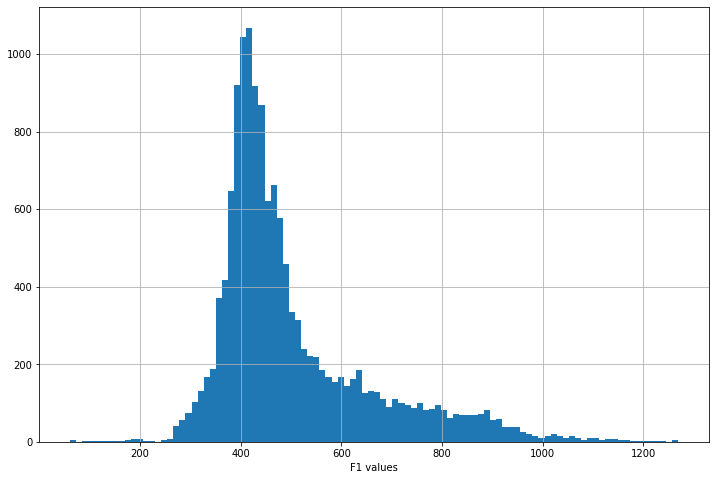

In [10]:
nbins = 100
n, bins, patches = plt.hist(test_formants["F1(Hz)"], nbins, log=False)

plt.rcParams['figure.figsize'] = [12, 8]

plt.xlabel('F1 values')
plt.grid(True)
plt.show()

In [8]:
test_formants["F2(Hz)"].describe()

count    14232.000000
mean      1660.866277
std        482.155909
min        303.413000
25%       1323.139000
50%       1638.544500
75%       1971.894000
max       2965.838000
Name: F2(Hz), dtype: float64

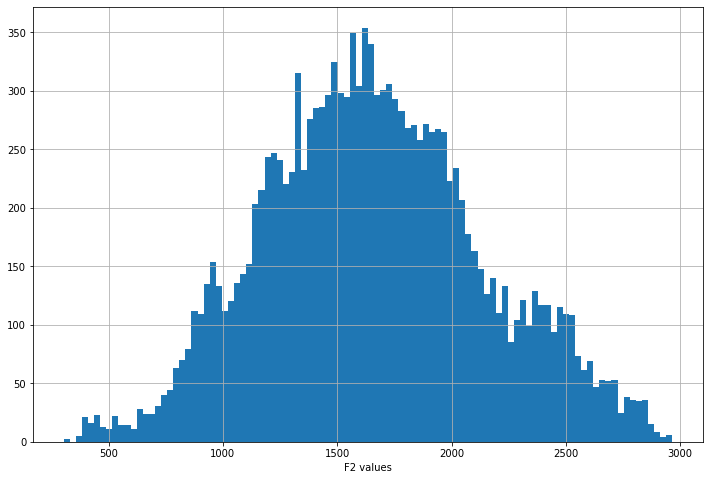

In [9]:
nbins = 100
n, bins, patches = plt.hist(test_formants["F2(Hz)"], nbins, log=False)

plt.xlabel('F2 values')
plt.grid(True)
plt.show()

<h2>To smooth or not to smooth?</h2>

In <a href="https://dx.doi.org/10.1121%2F1.4983342">Story & Bunton 2017</a>, who proposed using vowel space density as part of a set of diagnostics for characterization of speech, they used two filters to preprocess the formant traces: a "3-point median filter" followed by a "5-point smoothing filter". Brad's reasoning was that the first filter removes spurious outliers, then the second filter smooths the trace.

I'm not exactly sure of the specifics of their implementation of a median filter, but I did discover that SciPy has a built-in smoothing function:

https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

mentions a procedure called a Savitzky-Golay filter, which has been implemented in SciPy.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from scipy.signal import savgol_filter

# yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

test_formants["sF1(Hz)"] = savgol_filter(test_formants["F1(Hz)"], 5, 3)

In [8]:
test_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz),sF1(Hz)
0,0.027104,4,470.284,2388.557,3115.041,4090.268,--undefined--,470.290700
1,0.032104,5,458.411,2399.314,3125.814,4091.022,4490.571,458.384200
2,0.037104,5,449.381,2399.190,3142.412,3769.750,4096.546,449.421200
3,0.042104,5,442.823,2405.885,3149.537,3838.308,4112.435,443.000343
4,0.047104,5,437.897,2396.696,3136.249,3446.013,4132.887,437.813857
...,...,...,...,...,...,...,...,...
14227,71.162104,5,571.370,1459.228,1735.984,3019.530,3875.547,571.572029
14228,71.167104,5,541.743,1432.933,1942.820,2986.232,3880.944,541.674686
14229,71.172104,5,510.435,1384.167,2196.805,2959.452,3886.045,511.248857
14230,71.177104,5,486.526,1372.339,2298.003,2946.274,3891.940,485.983429


In [11]:
test_formants["F1dif"] = test_formants["F1(Hz)"] - test_formants["sF1(Hz)"]

In [36]:
test_formants["F1dif"].describe()

count    14232.000000
mean         0.000030
std         27.774662
min       -555.647229
25%         -1.506664
50%          0.001971
75%          1.488514
max        483.341657
Name: F1dif, dtype: float64

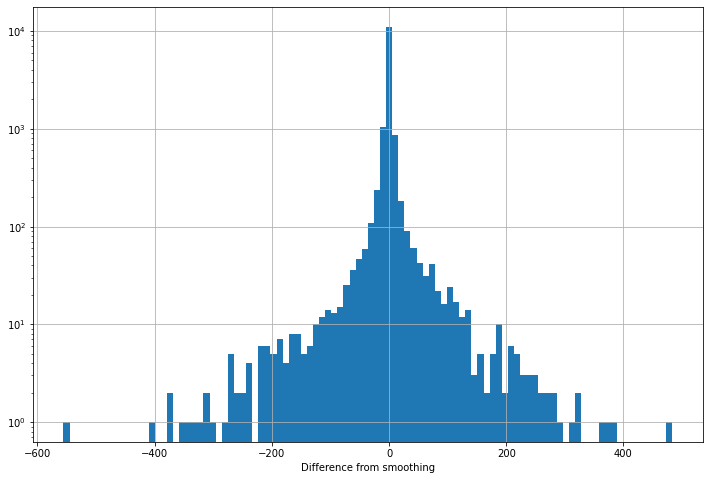

In [35]:
nbins = 100
n, bins, patches = plt.hist(test_formants["F1dif"], nbins, log = True)

plt.xlabel('Difference from smoothing')
plt.grid(True)
plt.show()

Here's a plot of just a section of the data, to show how the smoothed formant trace and the original formant trace compare.

<function matplotlib.pyplot.show(*args, **kw)>

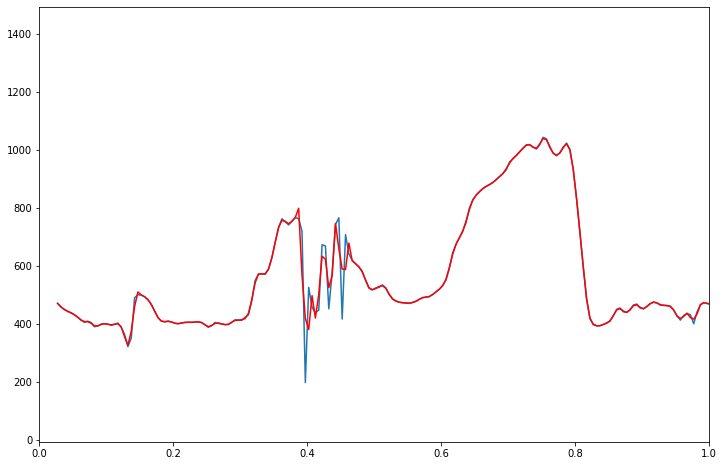

In [40]:
plt.plot(test_formants["time(s)"], test_formants["F1(Hz)"])
plt.plot(test_formants["time(s)"], test_formants["sF1(Hz)"], color='red')
plt.xlim(0, 1)
plt.show

Hmm, note that section of high variability around t=0.4s. This indicates to me that there's a problem with the calculation of formants, which is going to negatively impact any further analysis with them. Let's figure this out first.

My first thought is that, based on the way this script works, the formants are calculated on a speech audio file that isn't natural--it's been broken up into just the voiced segments, as determined by whether a pitch can be calculated at that time, and *then* the formants are calculated. This means that the formant calculation is going to do weird things when the time window for frequency calculation spans a time point where some of the audio file was removed.

Moreover, specifically in relation to smoothing over these same boundaries, the formants may jump at such boundaries in ways that are not smooth--so smoothing across these boundaries could actually make the formant trace *less* accurate.

Woudn't it work better to first calculate the formants over the un-chopped audio file, then keep the formant data in just those segments where there's also a pitch value that can be calculated?

<h2>Trying a new method for getting formants only when there's voicing</h2>

In [12]:
new_formants = pd.read_csv("test1.Formant.csv", sep='\t')
new_pitch = pd.read_csv("test1.Pitch.csv", sep='\t')

In [13]:
new_formants

,"File type = ""ooTextFile"""
0,"Object class = ""Table"""
1,numberOfColumns = 7
2,columnHeaders []:
3,columnHeaders [1]:
4,"label = ""time(s)"""
...,...
436148,"string = ""3785.047"""
436149,cells [6]:
436150,"string = ""4175.318"""
436151,cells [7]:


In [14]:
new_pitch

,"File type = ""ooTextFile"""
0,"Object class = ""Pitch 1"""
1,xmin = 0
2,xmax = 128.32122916666665
3,nx = 25655
4,dx = 0.005
...,...
581553,frequency = 64.52521594949303
581554,strength = 0.8624907776289835
581555,candidate [5]:
581556,frequency = 64.28672546107046


In [15]:
voiced_intervals = pd.read_csv("voiced_intervals.csv", sep='\t')

In [27]:
voiced_intervals

,interval,start,finish
0,2,1.100886,1.243106
1,4,1.334607,1.648636
2,6,1.692848,2.296450
3,8,2.328277,2.466137
4,10,3.680803,3.788330
...,...,...,...
217,436,126.318779,126.498357
218,438,126.514979,126.771437
219,440,127.040363,127.369883
220,442,127.475181,127.676223


In [30]:
test_formants = pd.read_csv("test1_formants.csv", sep='\t')
test_formants

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz)
0,0.025615,4,424.947,2065.922,3355.977,4532.285,--undefined--
1,0.030615,4,1111.613,2570.318,3564.852,4146.409,--undefined--
2,0.035615,4,798.367,2032.961,3202.946,4218.430,--undefined--
3,0.040615,4,558.915,1865.224,3179.625,4278.080,--undefined--
4,0.045615,4,151.915,1814.673,3186.265,4198.066,--undefined--
...,...,...,...,...,...,...,...
25650,128.275615,3,1859.839,3272.122,4399.447,--undefined--,--undefined--
25651,128.280615,3,1886.530,3258.996,4302.018,--undefined--,--undefined--
25652,128.285615,3,1861.747,3208.915,4168.759,--undefined--,--undefined--
25653,128.290615,4,1627.194,2960.999,4124.295,4926.419,--undefined--


Let's try IntervalArrays from Pandas, to create a boolean filter for the formant data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.arrays.IntervalArray.html

In [36]:
VoicedIntervalArray = pd.arrays.IntervalArray.from_arrays(voiced_intervals["start"],
                                                       voiced_intervals["finish"],
                                                       closed="left")
VoicedIntervalArray

<IntervalArray>
[[1.1008863200990615, 1.2431062462979623), [1.3346071036089735, 1.6486355694131138), [1.6928482238259284, 2.2964495643541216), [2.328277344955924, 2.466137022941369), [3.680803134361234, 3.7883299088789664) ... [126.31877856871672, 126.49835743951677), [126.51497897196285, 126.77143709418516), [127.04036283638192, 127.369883370742), [127.4751810748347, 127.67622276270204), [127.69306496336414, 128.09075761401087)]
Length: 222, closed: left, dtype: interval[float64]

In [38]:
#test_formants_filtered = test_formants[test_formants["time(s)"]]
pd.Index(test_formants["time(s)"])

Float64Index([            0.025615, 0.030614999999999996,             0.035615,
                          0.040615, 0.045614999999999996,             0.050615,
                          0.055615, 0.060614999999999995,  0.06561499999999999,
                          0.070615,
              ...
                128.25061499999998,   128.25561499999998,           128.260615,
                        128.265615,           128.270615,           128.275615,
                128.28061499999998,   128.28561499999998,           128.290615,
                        128.295615],
             dtype='float64', name='time(s)', length=25655)

I can't seem to get this to work. The vectorization of it seems to want that each time point would have its own time interval in the filter that it's getting evaluated against, instead of, for each time point, going through all the intervals to see if that time point is found within *any* of them.

Sigh. Everything has already been asked at Stack Overflow:

https://stackoverflow.com/questions/50714700/pandas-find-values-within-multiple-ranges-defined-by-start-and-stop-columns

In [48]:
voiced_interval_array = pd.IntervalIndex.from_arrays(voiced_intervals['start'],
                                                     voiced_intervals['finish'],
                                                     'both')
formants_voiced = test_formants[voiced_interval_array.get_indexer(test_formants["time(s)"].values) != -1]

In [49]:
formants_voiced

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz)
216,1.105615,5,478.968,2230.750,3087.914,4100.960,5008.901
217,1.110615,5,477.263,2263.468,3079.025,4036.156,4676.939
218,1.115615,5,476.640,2331.456,3087.304,4068.208,4558.995
219,1.120615,5,474.430,2365.045,3085.500,4095.488,4429.937
220,1.125615,5,464.997,2387.503,3078.351,4095.774,4388.667
...,...,...,...,...,...,...,...
25609,128.070615,4,536.757,1536.890,2824.934,3870.317,--undefined--
25610,128.075615,4,624.482,1556.827,2850.663,3815.094,--undefined--
25611,128.080615,4,667.785,1498.604,2897.902,3860.592,--undefined--
25612,128.085615,4,641.590,1477.034,2908.831,3964.193,--undefined--


Just to make sure this looks right, let's look at the start of the first voiced interval, which (from voiced_intervals) should be just after t = 1.100886s

In [47]:
test_formants[215:218]

,time(s),nformants,F1(Hz),F2(Hz),F3(Hz),F4(Hz),F5(Hz)
215,1.100615,4,476.497,2240.709,3100.225,4119.666,--undefined--
216,1.105615,5,478.968,2230.750,3087.914,4100.960,5008.901
217,1.110615,5,477.263,2263.468,3079.025,4036.156,4676.939
